In [1]:
#Import necessary packages to work with data
import pandas as pd
import numpy as np
import seaborn as sns
pd.plotting.register_matplotlib_converters()
from matplotlib import pyplot as plt
%matplotlib inline
import random
from datetime import datetime
#import geopandas
print("Setup complete")

Setup complete


In [2]:
df = pd.read_csv('150kplus.csv')

In [3]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


In [4]:
df.shape

(968538, 53)

In [5]:
#Append column to keep track of which observations originally belonged to the >$150k data set
df['150k+'] = True

In [6]:
#Read in data for loans smaller than $150k
df1 = pd.read_csv('sub150k.csv')

In [7]:
#Set a flag indicating that these are originally from the <$150k data set
df1['150k+'] = False

In [8]:
df1.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,150k+
0,3509338307,01/22/2021,NaN,PPS,Exemption 6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,NaN,NaN,False
1,5375617707,05/01/2020,101.0,PPP,NOT AVAILABLE,NaN,NaN,NaN,NaN,07/16/2021,...,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,150083.01,06/11/2021,False
2,9677497701,05/01/2020,464.0,PPP,NORTH CHARLESTON HOSPITALITY GROUP LLC,192 College Park Rd,Ladson,NaN,29456-3517,09/25/2021,...,19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,141920.11,08/25/2021,False
3,9547167709,05/01/2020,464.0,PPP,Q AND J SERVICES LLC,301 Old Georgetown Road,Manning,NaN,29102-2734,04/20/2021,...,19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,137747.78,03/29/2021,False
4,8885207205,04/28/2020,NaN,PPP,Exemption 6,NaN,NaN,NaN,NaN,05/20/2021,...,NaN,NaN,NaN,NaN,Unanswered,Unanswered,Y,131876.98,04/27/2021,False


In [9]:
df1.shape

(900000, 54)

<font size = 3> Now that we've checked that the data have the same shape and added a column tracking their origin, we can merge them into one set </font>

In [10]:
#Merge the two data frames together. Ignore index so that we don't get an error and veryify that there are no duplicate observations
df = pd.concat([df, df1], ignore_index = True, verify_integrity = True, sort = False)

In [11]:
#Sample 100,000 observations to make operations less resource consuming
df = df.sample(100000, random_state = 2422)

In [12]:
df['150k+'].value_counts()

True     51818
False    48182
Name: 150k+, dtype: int64

In [13]:
#Save data frame to a csv
df.to_csv('/Users/johntate/Desktop/ITCS 3162/Project 1/Original Datasets/sampled_df.csv', index = False)

In [14]:
df.columns

Index(['LoanNumber', 'DateApproved', 'SBAOfficeCode', 'ProcessingMethod',
       'BorrowerName', 'BorrowerAddress', 'BorrowerCity', 'BorrowerState',
       'BorrowerZip', 'LoanStatusDate', 'LoanStatus', 'Term',
       'SBAGuarantyPercentage', 'InitialApprovalAmount',
       'CurrentApprovalAmount', 'UndisbursedAmount', 'FranchiseName',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip', 'RuralUrbanIndicator', 'HubzoneIndicator',
       'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
       'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
       'NAICSCode', 'Race', 'Ethnicity', 'UTILITIES_PROCEED',
       'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
       'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
       'DEBT_INTEREST_PROCEED', 'BusinessType', 'OriginatingLenderLocationID',
       'OriginatingLender', 'Originatin

Now that our data set is fully formed, it's time to look at which features might be useful in better understanding the data set. Colums of interest include:

In [15]:
#List of columns used
use_columns = ['DateApproved', 'InitialApprovalAmount', 'BorrowerName', 'BorrowerState', 
               'LoanStatus', 'FranchiseName',
               'ServicingLenderName', 'RuralUrbanIndicator', 'HubzoneIndicator', 'BusinessAgeDescription', 'JobsReported', 
               'NAICSCode', 'Race', 'Ethnicity', 'UTILITIES_PROCEED', 'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
               'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED', 'Gender', 'Veteran', 'NonProfit', 'ForgivenessAmount', '150k+', 'ForgivenessDate'
              ]

In [16]:
#Print out all column names and their data type for reference
for col in use_columns:
    print(col, ": ", df[col].dtype)

DateApproved :  object
InitialApprovalAmount :  float64
BorrowerName :  object
BorrowerState :  object
LoanStatus :  object
FranchiseName :  object
ServicingLenderName :  object
RuralUrbanIndicator :  object
HubzoneIndicator :  object
BusinessAgeDescription :  object
JobsReported :  float64
NAICSCode :  float64
Race :  object
Ethnicity :  object
UTILITIES_PROCEED :  float64
PAYROLL_PROCEED :  float64
MORTGAGE_INTEREST_PROCEED :  float64
RENT_PROCEED :  float64
REFINANCE_EIDL_PROCEED :  float64
HEALTH_CARE_PROCEED :  float64
Gender :  object
Veteran :  object
NonProfit :  object
ForgivenessAmount :  float64
150k+ :  bool
ForgivenessDate :  object


In [17]:
#Subset the data frame with our columns to be used
df = df[use_columns]

In [18]:
#Check shape of new DF to ensure that columns have been carried  over
df.shape

(100000, 26)

In [19]:
#Check for NA values - QUESTION: Since there are few NA values where there shouldn't be (Borrower Name, State, NAICS) should I bother to drop these NA values or just exclude them later
df.isna().sum()

DateApproved                     0
InitialApprovalAmount            0
BorrowerName                     0
BorrowerState                    6
LoanStatus                       0
FranchiseName                97366
ServicingLenderName              2
RuralUrbanIndicator              0
HubzoneIndicator                 0
BusinessAgeDescription           0
JobsReported                     0
NAICSCode                     1111
Race                             0
Ethnicity                        0
UTILITIES_PROCEED            67213
PAYROLL_PROCEED                144
MORTGAGE_INTEREST_PROCEED    96408
RENT_PROCEED                 92042
REFINANCE_EIDL_PROCEED       98311
HEALTH_CARE_PROCEED          95802
Gender                           0
Veteran                          0
NonProfit                    95825
ForgivenessAmount            17593
150k+                            0
ForgivenessDate              17593
dtype: int64

Since the DateApproved feature is currently a string object, let's use the datetime package to turn it into a datetime object that can be manipulated easily

In [20]:
#Convert to dt and check to ensure it looks accurate
df['DateApproved'] = pd.to_datetime(df['DateApproved'])
df['DateApproved'].head()

914802    2020-04-30
1357829   2021-02-10
1630513   2021-01-19
801618    2020-04-11
223328    2021-01-22
Name: DateApproved, dtype: datetime64[ns]

Since there's a really wide range of loan amounts, let's create a feature that bins them to help compare them categorically

In [21]:
#Categories: <$50k, $50k-$100k, $100k-$250k, $250k-$500k, $500k+
def bin_loans(row):
    if row['InitialApprovalAmount'] < 50000:
        return "< $50k"
    if (row['InitialApprovalAmount'] >= 50000) and (row['InitialApprovalAmount'] <= 100000):
        return "$50k-$100k"
    if (row['InitialApprovalAmount'] > 100000) and (row['InitialApprovalAmount'] <= 250000):
        return "$100k-$250k"
    if (row['InitialApprovalAmount'] > 250000) and (row['InitialApprovalAmount'] <= 500000):
        return "$250k-$500k"
    if (row['InitialApprovalAmount'] > 500000):
        return "$500k+"

In [22]:
#Call our categorization function on each row of the data frame
df['Loan_Cat'] = df.apply(lambda row: bin_loans(row), axis = 1)

In [23]:
#Double check that the spread of categories looks appropriate
df['Loan_Cat'].value_counts(normalize = True)

< $50k         0.34240
$100k-$250k    0.25246
$250k-$500k    0.16532
$500k+         0.14301
$50k-$100k     0.09681
Name: Loan_Cat, dtype: float64

In [24]:
#Drop observations that have NA values for borrower state. In most of the other cases NA does actually indicate a value (i.e. not a franchise, no expenses forgiven, etc...)
df.dropna(axis = 0, subset = ['BorrowerState'])

,DateApproved,InitialApprovalAmount,BorrowerName,BorrowerState,LoanStatus,FranchiseName,ServicingLenderName,RuralUrbanIndicator,HubzoneIndicator,BusinessAgeDescription,...,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,Gender,Veteran,NonProfit,ForgivenessAmount,150k+,ForgivenessDate,Loan_Cat
914802,2020-04-30,187700.0,"FRAZIER ELECTRICAL CONTRACTING, INC.",VA,Paid in Full,NaN,Truist Bank d/b/a Branch Banking & Trust Co,R,N,Existing or more than 2 years old,...,NaN,NaN,NaN,Unanswered,Unanswered,NaN,189165.10,True,02/16/2021,$100k-$250k
1357829,2021-02-10,9115.0,PAGE ARIZONA VRBO LLC,AZ,Paid in Full,NaN,"Wells Fargo Bank, National Association",R,N,Existing or more than 2 years old,...,NaN,NaN,NaN,Unanswered,Unanswered,NaN,9167.94,False,09/20/2021,< $50k
1630513,2021-01-19,43662.0,BRANDOLINO GROUP INC.,CA,Paid in Full,NaN,"Bank of Southern California, National Association",U,N,Existing or more than 2 years old,...,NaN,NaN,NaN,Unanswered,Unanswered,NaN,43920.38,False,09/15/2021,< $50k
801618,2020-04-11,329460.0,STONE SOURCE INC,TN,Paid in Full,NaN,FirstBank,U,Y,Existing or more than 2 years old,...,NaN,NaN,NaN,Unanswered,Unanswered,NaN,331574.04,True,12/07/2020,$250k-$500k
223328,2021-01-22,424735.0,SOUTH PACIFIC ENTERPRISES LP,FL,Paid in Full,NaN,Paradise Bank,U,N,Existing or more than 2 years old,...,NaN,NaN,NaN,Unanswered,Unanswered,NaN,428333.45,True,11/24/2021,$250k-$500k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395781,2020-05-01,187825.0,"GILBERT, KELLY &AMP; COUTURIE, INC.",LA,Paid in Full,NaN,"JPMorgan Chase Bank, National Association",U,N,Existing or more than 2 years old,...,NaN,NaN,NaN,Unanswered,Unanswered,NaN,189747.49,True,05/13/2021,$100k-$250k
512589,2021-02-17,175905.0,M & B LAND AND CATTLE LLC,MO,Exemption 4,NaN,"UMB Bank, National Association",R,Y,Existing or more than 2 years old,...,NaN,NaN,NaN,Unanswered,Unanswered,NaN,155968.39,True,12/14/2021,$100k-$250k
217709,2020-04-07,569800.0,"THE GRAND MARLIN OF PANAMA CITY BEACH, LLC",FL,Paid in Full,NaN,Hancock Whitney Bank,U,N,Existing or more than 2 years old,...,64080.0,NaN,14592.0,Unanswered,Unanswered,NaN,575165.62,True,03/19/2021,$500k+
26432,2021-01-20,324000.2,EL SOL TRAVEL INC.,AZ,Exemption 4,NaN,"Zions Bank, A Division of",U,N,Existing or more than 2 years old,...,NaN,NaN,NaN,Unanswered,Unanswered,NaN,NaN,True,NaN,$250k-$500k


#### Import population data to use for analyzing states' per capital info

In [25]:
#Dictionary to translate between state names and abbreviations for merging population info

state_codes= pd.DataFrame ([
    ["Alabama", "AL"],
    ["Alaska", "AK"],
    ["Arizona", "AZ"],
    ["Arkansas", "AR"],
    ["California", "CA"],
    ["Colorado", "CO"],
    ["Connecticut", "CT"],
    ["Delaware", "DE"],
    ["Florida", "FL"],
    ["Georgia", "GA"],
    ["Hawaii", "HI"],
    ["Idaho", "ID"],
    ["Illinois", "IL"],
    ["Indiana", "IN"],
    ["Iowa", "IA"],
    ["Kansas", "KS"],
    ["Kentucky", "KY"],
    ["Louisiana", "LA"],
    ["Maine", "ME"],
    ["Maryland", "MD"],
    ["Massachusetts", "MA"],
    ["Michigan", "MI"],
    ["Minnesota", "MN"],
    ["Mississippi", "MS"],
    ["Missouri", "MO"],
    ["Montana", "MT"],
    ["Nebraska", "NE"],
    ["Nevada", "NV"],
    ["New Hampshire", "NH"],
    ["New Jersey", "NJ"],
    ["New Mexico", "NM"],
    ["New York", "NY"],
    ["North Carolina", "NC"],
    ["North Dakota", "ND"],
    ["Ohio", "OH"],
    ["Oklahoma", "OK"],
    ["Oregon", "OR"],
    ["Pennsylvania", "PA"],
    ["Rhode Island", "RI"],
    ["South Carolina", "SC"],
    ["South Dakota", "SD"],
    ["Tennessee", "TN"],
    ["Texas", "TX"],
    ["Utah", "UT"],
    ["Vermont", "VT"],
    ["Virginia", "VA"],
    ["Washington", "WA"],
    ["West Virginia", "WV"],
    ["Wisconsin", "WI"],
    ["Wyoming", "WY"],
    ["District of Columbia", "DC"],
    ["American Samoa", "AS"],
    ["Guam", "GU"],
    ["Northern Mariana Islands", "MP"],
    ["Puerto Rico", "PR"],
    ["United States Minor Outlying Islands", "UM"],
    ["U.S. Virgin Islands", "VI"],
], columns = ['State Name', 'Abbreviation'])

In [26]:
#Check to make sure that our DF looks correct
state_codes.head(3)

,State Name,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ


In [27]:
#Import census CSV and take a first look at it
population = pd.read_csv('population_data.csv')
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [28]:
#Subset the data set to only include the state's name and population estimate from 2019
pop_columns = ['NAME', 'POPESTIMATE2019']
population = population[pop_columns]

#Double check to make sure all looks correct
population.head(10)

,NAME,POPESTIMATE2019
0,United States,328239523
1,Northeast Region,55982803
2,Midwest Region,68329004
3,South Region,125580448
4,West Region,78347268
5,Alabama,4903185
6,Alaska,731545
7,Arizona,7278717
8,Arkansas,3017804
9,California,39512223


In [29]:
#Merge the population DF with the state abbreviations so that we can fold it into the totals by state later on
population= population.merge(state_codes, how='left', left_on='NAME', right_on='State Name')
population

,NAME,POPESTIMATE2019,State Name,Abbreviation
0,United States,328239523,NaN,NaN
1,Northeast Region,55982803,NaN,NaN
2,Midwest Region,68329004,NaN,NaN
3,South Region,125580448,NaN,NaN
4,West Region,78347268,NaN,NaN
5,Alabama,4903185,Alabama,AL
6,Alaska,731545,Alaska,AK
7,Arizona,7278717,Arizona,AZ
8,Arkansas,3017804,Arkansas,AR
9,California,39512223,California,CA


In [30]:
#Remove the first five rows of total and regional summaries
population = population.iloc[5:]

In [31]:
population.drop('State Name', axis = 1, inplace = True)
population.head()

/Users/johntate/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,NAME,POPESTIMATE2019,Abbreviation
5,Alabama,4903185,AL
6,Alaska,731545,AK
7,Arizona,7278717,AZ
8,Arkansas,3017804,AR
9,California,39512223,CA


## Summary Statistics

SS to look at:
- For all quantitative variables list min, max, median, and standard deviation. It's probably worth doing this for initial loan amount, jobs reported, proceed by category, total amount forgiven.
- For categorical variables create a frequency table. Variables to do this for include gender, race/ethnicity, franchise (yes vs no), whether the loan has been forgiven, veteran, nonprofit
- For larger categorical variables let's look at frequency tables of the top and bottom ten in terms of loans approved

In [32]:
#Initial loan amount statistics
df['InitialApprovalAmount'].describe()

count    1.000000e+05
mean     2.957491e+05
std      5.878971e+05
min      1.200000e+01
25%      2.879938e+04
50%      1.547360e+05
75%      3.066000e+05
max      1.000000e+07
Name: InitialApprovalAmount, dtype: float64

In [33]:
df['InitialApprovalAmount'].median()

154736.0

In [34]:
#Jobs repported statistics
df['JobsReported'].describe()

count    100000.000000
mean         29.625370
std          53.901224
min           1.000000
25%           3.000000
50%          13.000000
75%          32.000000
max         500.000000
Name: JobsReported, dtype: float64

In [35]:
df['JobsReported'].median()

13.0

In [36]:
df['ForgivenessAmount'].describe()

count    8.240700e+04
mean     3.003875e+05
std      5.900027e+05
min      1.000000e-02
25%      3.163068e+04
50%      1.563561e+05
75%      3.107408e+05
max      1.015397e+07
Name: ForgivenessAmount, dtype: float64

In [37]:
df['ForgivenessAmount'].median()

156356.15

In [38]:
df['PAYROLL_PROCEED'].describe()

count    9.985600e+04
mean     2.857124e+05
std      5.606280e+05
min      0.000000e+00
25%      2.800000e+04
50%      1.504995e+05
75%      2.986345e+05
max      1.000000e+07
Name: PAYROLL_PROCEED, dtype: float64

In [39]:
df['PAYROLL_PROCEED'].median()

150499.5

In [40]:
#Now let's start with some categorical data
df['Gender'].value_counts()

Unanswered    100000
Name: Gender, dtype: int64

Unfortunately it looks like gender has been redacted or corrupted in both original data sets. We won't be able to to work with any gender data here but it's something worth trying to figure out how to include in any future analysis.

### Franchise Vs. Independent

In [41]:
#Try two, let's break down the ratio of franchise to non-franchise locations 
#and look at what the most frequently occuring franchises were

franchise = df['FranchiseName'].value_counts(dropna = False).nlargest(11)
franchise

NaN                                                                                        97366
Subway                                                                                       110
General Motors, LLC (Chevrolet, Buick, GM, Cadillac) Dealer Sales and Service Agreement      105
McDonalds                                                                                     94
Ford Motor Company Dealer Sales and Service Agreement                                         72
IHOP                                                                                          57
Chrysler - Sales and Service Agreement                                                        35
Holiday Inn Express (License Agreement)                                                       34
Hampton Inn                                                                                   33
Great Clips                                                                                   32
Denny's                       

It looks like the vast majority were non-franchised establishments. Let's look at the same information as % of total for perspective.

In [42]:
franchise_norm = df['FranchiseName'].value_counts(normalize = True, dropna = False).nlargest(11)
franchise_norm

NaN                                                                                        0.97366
Subway                                                                                     0.00110
General Motors, LLC (Chevrolet, Buick, GM, Cadillac) Dealer Sales and Service Agreement    0.00105
McDonalds                                                                                  0.00094
Ford Motor Company Dealer Sales and Service Agreement                                      0.00072
IHOP                                                                                       0.00057
Chrysler - Sales and Service Agreement                                                     0.00035
Holiday Inn Express (License Agreement)                                                    0.00034
Hampton Inn                                                                                0.00033
Great Clips                                                                                0.00032
Denny's   

### Loan Amounts (Binned)

The summary statistics for loan amounts were useful but let's also take a look at them grouped to give us some additional feel for distribution. *Note that $50k - $100k is out of order and appears at the end.

In [43]:
Loan_cat_dist = df['Loan_Cat'].value_counts()

In [44]:
#Let's look at the same data normalized
Loan_cat_dist_norm = df['Loan_Cat'].value_counts(normalize = True)
Loan_cat_dist_norm

< $50k         0.34240
$100k-$250k    0.25246
$250k-$500k    0.16532
$500k+         0.14301
$50k-$100k     0.09681
Name: Loan_Cat, dtype: float64

### Veterans

In [45]:
vets = df['Veteran'].value_counts()
vets

Unanswered    100000
Name: Veteran, dtype: int64

Bummer, it looks like veteran status had the same issue as gender.

### Urban vs. Rural and Development Zones

In [46]:
#Check the spread between businesses that were located in urban and rural areas that received loans.
urban_rural = df['RuralUrbanIndicator'].value_counts()
urban_rural

U    83413
R    16587
Name: RuralUrbanIndicator, dtype: int64

In [47]:
urban_rural_norm = df['RuralUrbanIndicator'].value_counts(normalize= True)
urban_rural_norm

U    0.83413
R    0.16587
Name: RuralUrbanIndicator, dtype: float64

In [48]:
#Check the frequency of businesses that were located in Hub Zones (see SBA documentation)
hub = df['HubzoneIndicator'].value_counts(dropna = False)
hub

N    72232
Y    27768
Name: HubzoneIndicator, dtype: int64

In [49]:
hub_norm = df['HubzoneIndicator'].value_counts(dropna = False, normalize = True)
hub_norm

N    0.72232
Y    0.27768
Name: HubzoneIndicator, dtype: float64

### Non-profit

In [50]:
#Check for the rate at which non-profits were awarded loans
nonprofit = df['NonProfit'].value_counts(dropna = False)
nonprofit

NaN    95825
Y       4175
Name: NonProfit, dtype: int64

In [51]:
nonprofit_norm = df['NonProfit'].value_counts(dropna = False, normalize = True)
nonprofit_norm

NaN    0.95825
Y      0.04175
Name: NonProfit, dtype: float64

### Breakdown by state

We'll need to create a new data frame using our list of states/population df to run this analysis

In [52]:
#Create a new data frame with the total loans awarded for each state

totals_by_state = df.groupby('BorrowerState')['InitialApprovalAmount'].sum().reset_index().sort_values(by = 'InitialApprovalAmount', ascending = False)
totals_by_state.head()

,BorrowerState,InitialApprovalAmount
5,CA,5.195085e+09
37,NY,2.282792e+09
47,TX,2.194556e+09
10,FL,1.543993e+09
16,IL,1.253803e+09


In [53]:
population.head()

,NAME,POPESTIMATE2019,Abbreviation
5,Alabama,4903185,AL
6,Alaska,731545,AK
7,Arizona,7278717,AZ
8,Arkansas,3017804,AR
9,California,39512223,CA


In [54]:
#Join the totals by state and population data frames
totals_by_state = totals_by_state.merge(population, how='left', left_on='BorrowerState', 
                                       right_on='Abbreviation')

In [55]:
#Check to make sure that our merge was successful
totals_by_state.head(5)

,BorrowerState,InitialApprovalAmount,NAME,POPESTIMATE2019,Abbreviation
0,CA,5.195085e+09,California,39512223.0,CA
1,NY,2.282792e+09,New York,19453561.0,NY
2,TX,2.194556e+09,Texas,28995881.0,TX
3,FL,1.543993e+09,Florida,21477737.0,FL
4,IL,1.253803e+09,Illinois,12671821.0,IL


In [56]:
#Create a new column that calculates the total amount loaned per citizen
totals_by_state['Loan_per_cap'] = totals_by_state.apply(lambda x: x['InitialApprovalAmount'] / x['POPESTIMATE2019'], axis = 1)
totals_by_state.head()

,BorrowerState,InitialApprovalAmount,NAME,POPESTIMATE2019,Abbreviation,Loan_per_cap
0,CA,5.195085e+09,California,39512223.0,CA,131.480445
1,NY,2.282792e+09,New York,19453561.0,NY,117.345733
2,TX,2.194556e+09,Texas,28995881.0,TX,75.685082
3,FL,1.543993e+09,Florida,21477737.0,FL,71.888089
4,IL,1.253803e+09,Illinois,12671821.0,IL,98.944154


In [57]:
totals_by_state['Loan_per_cap'].describe()

count     52.000000
mean      85.560575
std       27.445138
min       17.393850
25%       69.945709
50%       83.305472
75%       98.622349
max      196.397928
Name: Loan_per_cap, dtype: float64

In [58]:
totals_by_state['Loan_per_cap'].median()

83.30547200951466

## Visualizations

Viz to create:

- Bar plot with total loans granted by state (for the top ten states) 
- Bar plot with total loans granted by state (for the bottom ten states)
- Bar plot of loans per capita (for the top ten states)
- Bar plot of loans per capita (for the bottom ten states)
- Line graph of loans granted by date
- Scatter plot of jobs reported by employer compared to loan amounts
- Bar chart of normalized urban vs. rural breakdown
- Bar chart of normalized hub zone breakdown
- Map of loans granted per state


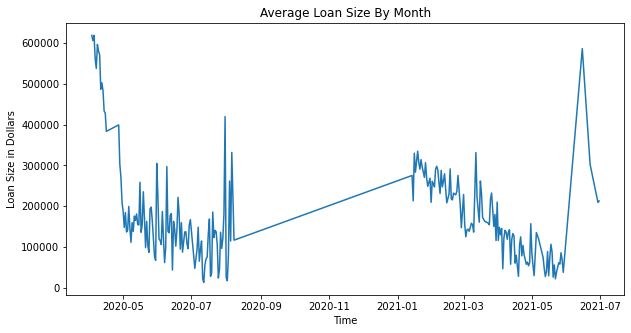

In [59]:
#Visualize the total amount amount of loans granted by date
plt.figure(figsize = (10,5))

ax = sns.lineplot(x = 'DateApproved', y = 'InitialApprovalAmount', data = df, ci = None).set(xlabel = 'Time', 
                                                                                             ylabel = 'Loan Size in Dollars', 
                                                                                             title = 'Average Loan Size By Month')
plt.savefig('Loans_by_month.png')


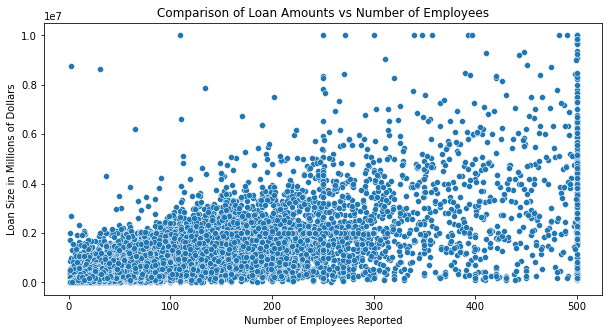

In [60]:
#Visualize the number of jobs reported versus the total amount of the loan
plt.figure(figsize = (10,5))
ax = sns.scatterplot(x = 'JobsReported', y = 'InitialApprovalAmount', data = df)
ax.set(title = 'Comparison of Loan Amounts vs Number of Employees', xlabel = 'Number of Employees Reported',
      ylabel = 'Loan Size in Millions of Dollars')
plt.savefig('jobs_vs_loan_amt')

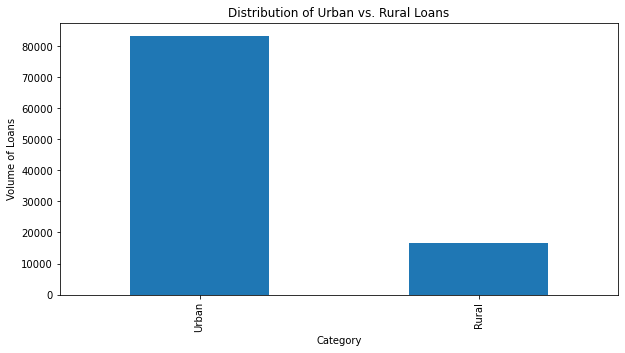

In [61]:
#Visualize the number of jobs reported versus the total amount of the loan
plt.figure(figsize = (10,5))
ax = df['RuralUrbanIndicator'].value_counts().plot.bar()
plt.xticks(ticks = [0,1], labels = ['Urban', 'Rural'])
ax.set(title = 'Distribution of Urban vs. Rural Loans', xlabel = 'Category',
      ylabel = 'Volume of Loans')
plt.savefig('rural_urban.png')

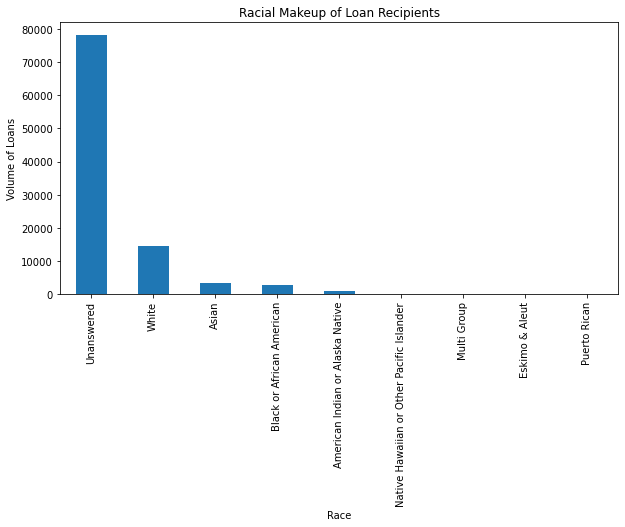

In [62]:
#Visualize the distribution of loans by race of applicant
plt.figure(figsize = (10,5))
plt.xticks(rotation=45)
ax = df['Race'].value_counts(dropna = False).plot.bar()
#plt.xticks(ticks = [0,1,2,], labels = ['Urban', 'Rural'])
ax.set(title = 'Racial Makeup of Loan Recipients', xlabel = 'Race',
      ylabel = 'Volume of Loans')
plt.savefig('race.png')

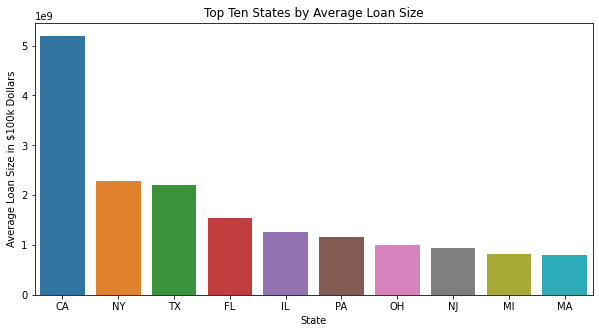

In [67]:
#Look at the average loan size for the top ten states
plt.figure(figsize = (10,5))

totals_by_state.sort_values(by = 'InitialApprovalAmount', ignore_index = True, inplace = True, ascending = False)

top_ten = totals_by_state.iloc[:10, :].copy()


ax = sns.barplot(x = 'BorrowerState', y = 'InitialApprovalAmount', data = top_ten).set(xlabel = 'State', 
                                                                                             ylabel =  'Average Loan Size in $100k Dollars', 
                                                                                             title = 'Top Ten States by Average Loan Size')
plt.savefig('top_ten_state.png')


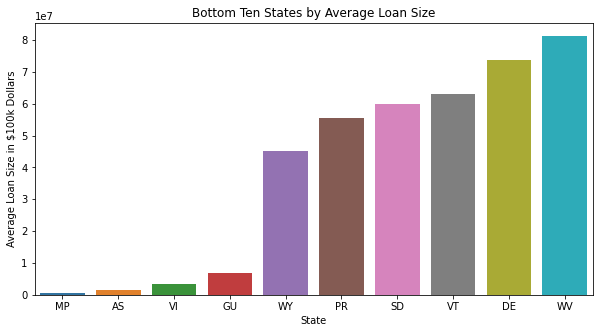

In [72]:
#Look at the average loan size for the bottom ten states
plt.figure(figsize = (10,5))

totals_by_state.sort_values(by = 'InitialApprovalAmount', ignore_index = True, inplace = True, ascending = True)

top_ten = totals_by_state.iloc[:10, :].copy()


ax = sns.barplot(x = 'BorrowerState', y = 'InitialApprovalAmount', data = top_ten).set(xlabel = 'State', 
                                                                                             ylabel =  'Average Loan Size in $100k Dollars', 
                                                                                             title = 'Bottom Ten States by Average Loan Size')

plt.savefig('bottom_ten_states.png')

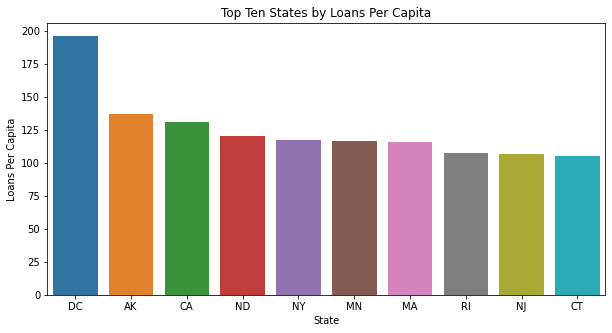

In [69]:
#Look at the top ten states in terms of loans per capita
plt.figure(figsize = (10,5))

totals_by_state.sort_values(by = 'Loan_per_cap', ignore_index = True, inplace = True, ascending = False)

top_ten = totals_by_state.iloc[:10]


ax = sns.barplot(x = 'BorrowerState', y = 'Loan_per_cap', data = top_ten).set(xlabel = 'State', 
                                                                                             ylabel =  'Loans Per Capita', 
                                                                                             title = 'Top Ten States by Loans Per Capita')
plt.savefig('top_ten_state_pc.png')

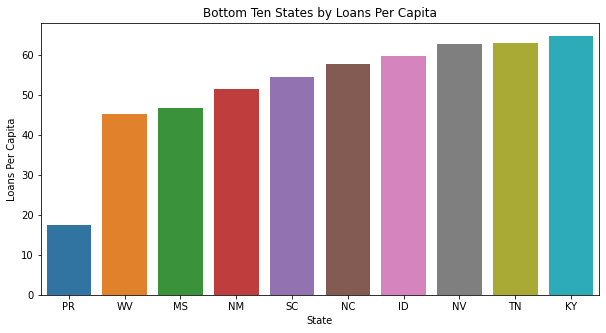

In [71]:
#Look at the bottom ten states in terms of loans per capita
plt.figure(figsize = (10,5))

totals_by_state.sort_values(by = 'Loan_per_cap', ignore_index = True, inplace = True, ascending = True)

top_ten = totals_by_state.iloc[:10]


ax = sns.barplot(x = 'BorrowerState', y = 'Loan_per_cap', data = top_ten).set(xlabel = 'State', 
                                                                                             ylabel =  'Loans Per Capita', 
                                                                                             title = 'Bottom Ten States by Loans Per Capita')
plt.savefig('bottom_ten_states_pc.png')